In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student_scores.csv')

In [3]:
data[:5]

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

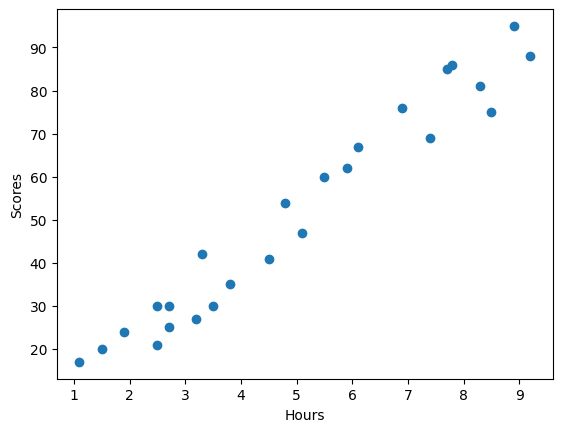

In [5]:
plt.scatter(data['Hours'],
            data['Scores'])
plt.xlabel("Hours")
plt.ylabel("Scores")

In [11]:
def linear_regression(x, y, lr=0.01, accuracy=0.001, k=0, b=0, max_iterations=1000, freq=10):
    iteration=0
    mse_pred = 0
    mse_cur = 1

    while abs(mse_cur - mse_pred) > accuracy:
        iteration +=1
        y_pred = k * x + b
        error = y - y_pred

        k_grad = -2/x.shape[0] * np.sum(x * error)
        b_grad = -2/x.shape[0] * np.sum(error)

        k -= lr * k_grad
        b -= lr* b_grad

        mse_pred = mse_cur
        mse_cur = np.mean(error ** 2)
        
        if (iteration % freq) == 0:
            plt.figure(figsize=(10, 5))
            plt.scatter(x, y, color='blue')
            plt.plot(x, k * x + b, color='red')
            plt.xlabel("x")
            plt.ylabel("y")
            
            ax = plt.gca()
            #ax.set_aspect('equal', adjustable='datalim')
            for xi, yi, ypi in zip(x, y, k * x + b):
                side = abs(yi - ypi)  
                if yi > ypi:
                    lower_left = (xi - side,  ypi)
                else:                 
                    lower_left = (xi,  ypi)
                rect = plt.Rectangle(lower_left, side, side, edgecolor=(0, 1, 0, 0.7), facecolor=(0, 1, 0, 0.3), linestyle='-')
                ax.add_patch(rect)
            plt.show()
        if iteration >= max_iterations:
            print('Достигнуто максимальное количество итераций, mse = ', mse_cur)
            break
    
    plt.scatter(x, y, color='blue')
    plt.plot(x, k * x + b, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Итоговый график, точность {accuracy}, итерация {iteration}, k = {k}, b = {b}")
    plt.show()
    return k, b
    

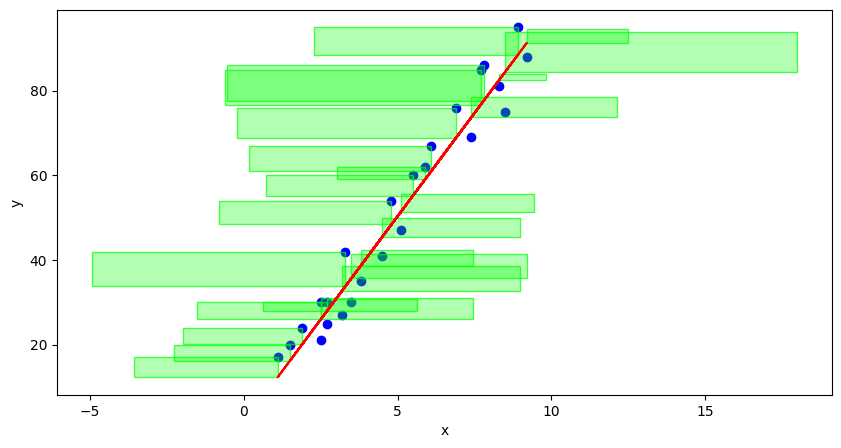

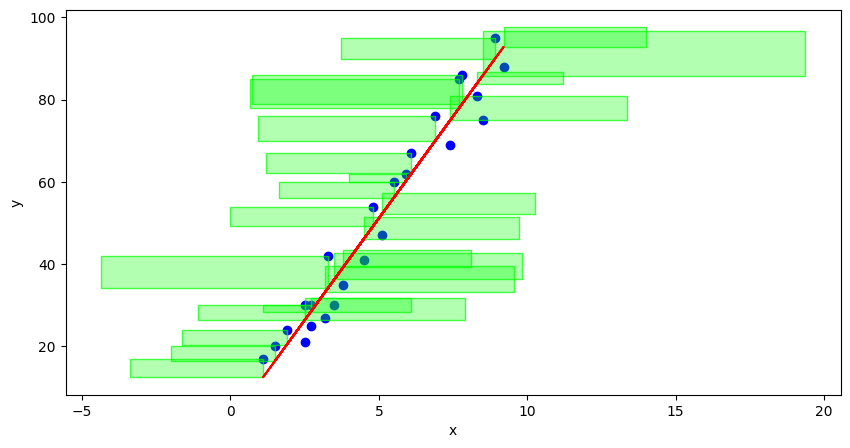

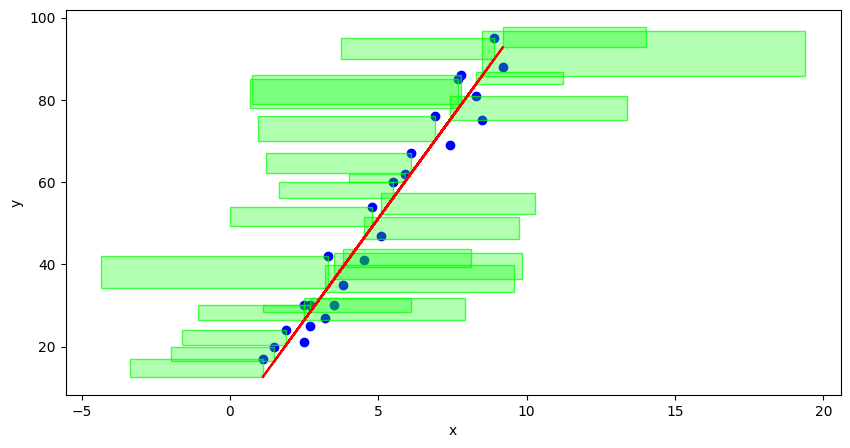

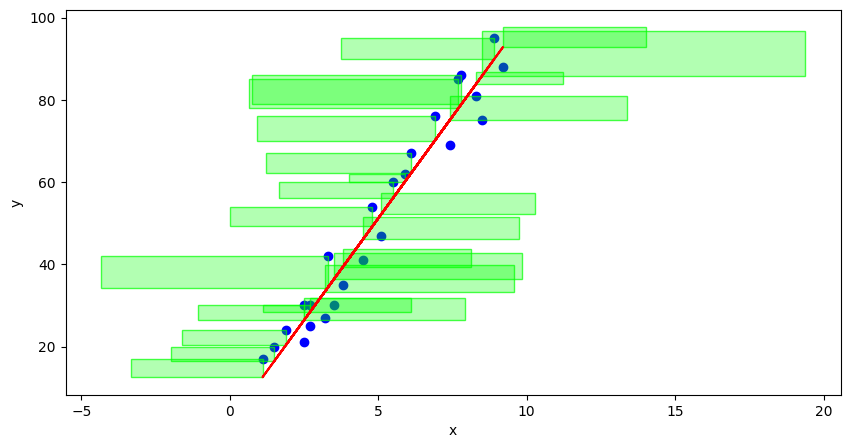

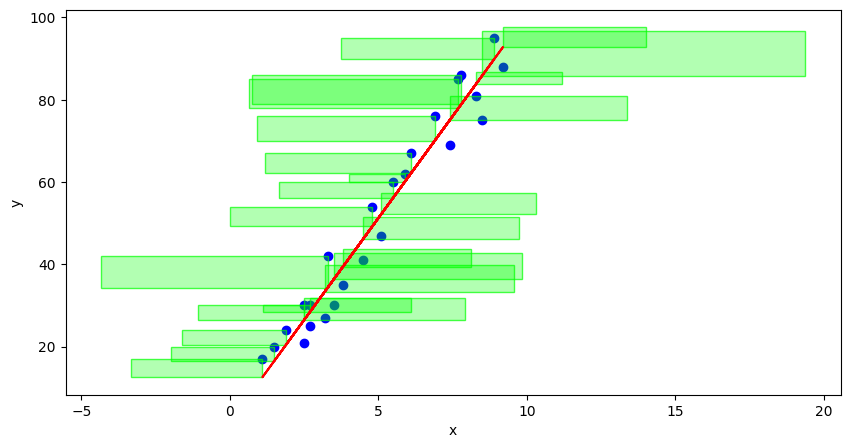

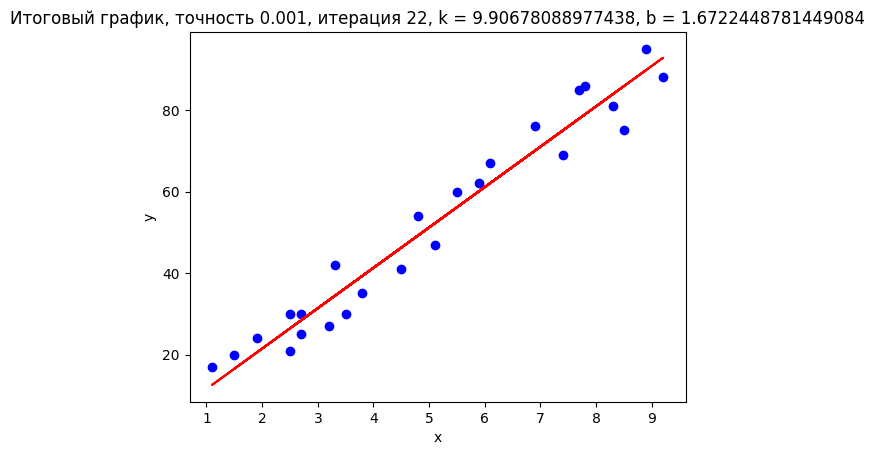

(np.float64(9.90678088977438), np.float64(1.6722448781449084))

In [10]:
linear_regression(x=data['Hours'], y=data['Scores'], freq=4)

прямоугольники на самом деле квадраты, во всем виновата неравномерный скейлинг по осям((( с равномерным выглядит тоже некрасиво:

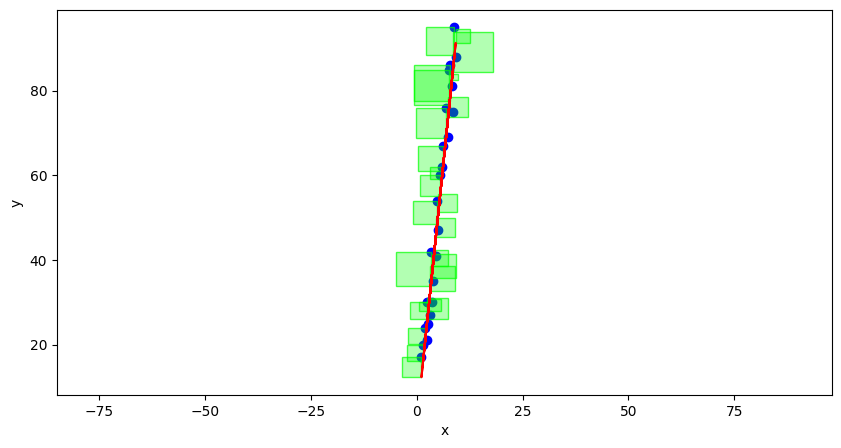

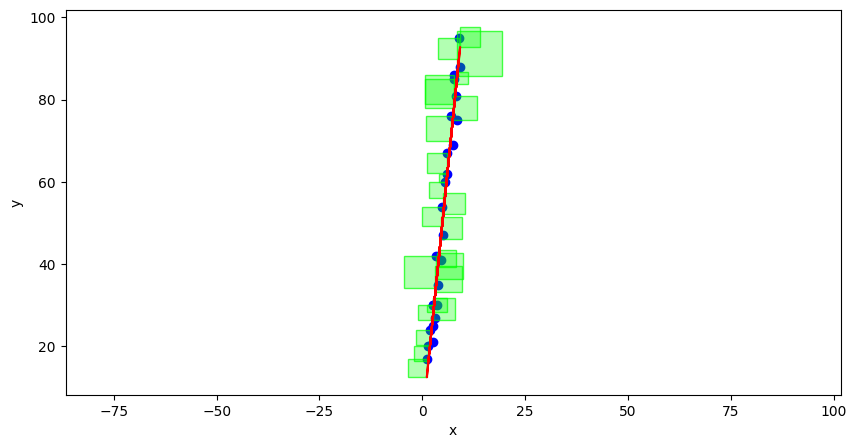

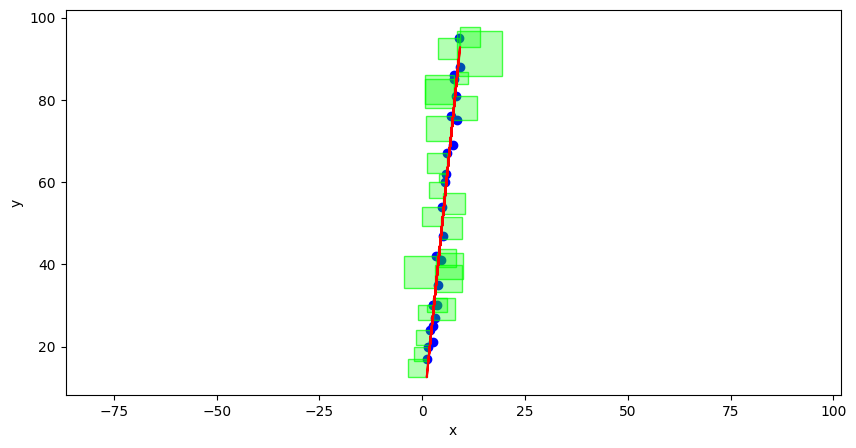

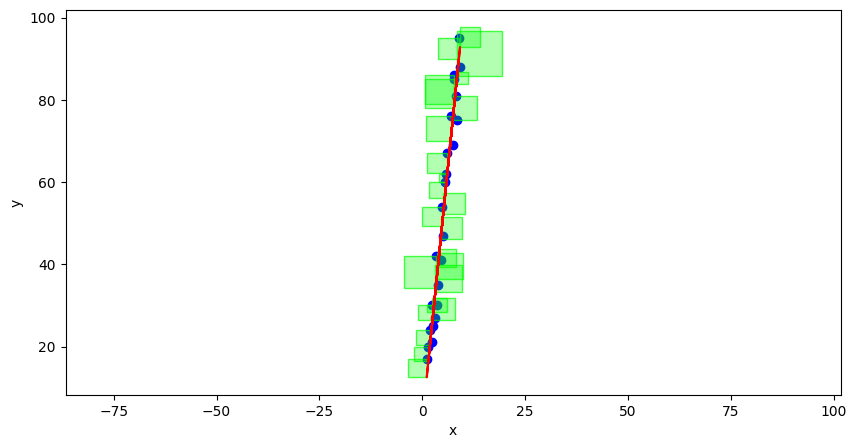

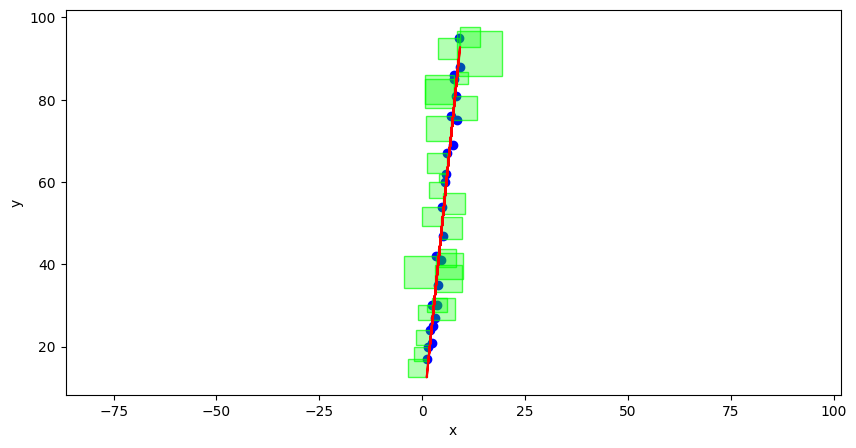

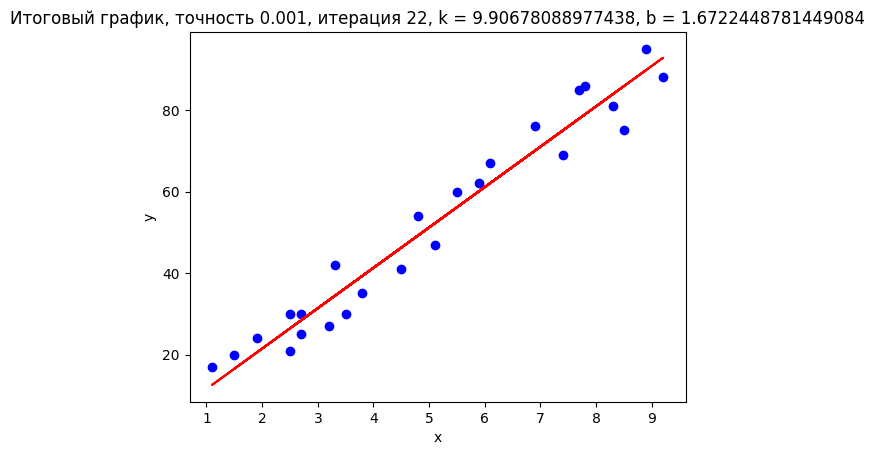

(np.float64(9.90678088977438), np.float64(1.6722448781449084))

In [12]:
linear_regression(x=data['Hours'], y=data['Scores'], freq=4)